In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('applications.csv', delimiter = ';')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(30751, 122)

In [8]:
df.dtypes

LOAN_ID                         int64
LOAN_DEFAULT                    int64
CONTRACT_TYPE                  object
GENDER                         object
OWN_CAR                        object
OWN_REALTY                     object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               int64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [9]:
df2 = pd.read_csv('previous_application.csv')
df2.head()

,Unnamed: 0,SK_ID_PREV,LOAN_ID,CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
1,2,1692577,125157,Consumer loans,9946.485,99319.5,109809.0,0.0,99319.5,SATURDAY,...,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-362.0,-32.0,-242.0,-237.0,1.0
2,3,2675386,118974,Consumer loans,6899.490,55831.5,60745.5,0.0,55831.5,SUNDAY,...,Connectivity,10.0,low_normal,POS mobile without interest,365243.0,-272.0,-2.0,365243.0,365243.0,1.0
3,4,2522811,120854,Revolving loans,33750.000,0.0,675000.0,NaN,NaN,THURSDAY,...,XNA,0.0,XNA,Card X-Sell,-332.0,-297.0,365243.0,365243.0,365243.0,0.0
4,5,2030030,133853,Consumer loans,7253.055,104809.5,121410.0,0.0,104809.5,SATURDAY,...,Consumer electronics,18.0,low_action,POS household without interest,365243.0,-315.0,195.0,365243.0,365243.0,0.0


In [38]:
df3 = pd.merge(df, df2.loc[:,['LOAN_ID', 'NAME_CONTRACT_STATUS', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']], how = 'inner',  on = 'LOAN_ID', suffixes = ('_new','_prev') ) 

In [39]:
df3.head()

,LOAN_ID,LOAN_DEFAULT,CONTRACT_TYPE,GENDER,OWN_CAR,OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_new,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_STATUS,AMT_APPLICATION,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,Approved,179055.0,179055.0,179055.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Approved,900000.0,1035882.0,900000.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Approved,337500.0,348637.5,337500.0
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Approved,24282.0,20106.0,24282.0
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,Approved,675000.0,675000.0,675000.0


In [40]:
df3.shape

(85051, 126)

In [41]:
df_ = df3.loc[:, ['LOAN_ID', 'LOAN_DEFAULT', 'GENDER', 'CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS', 'AMT_INCOME_TOTAL','AMT_CREDIT_new', 'AMT_CREDIT_prev', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_new', 'AMT_GOODS_PRICE_prev', 'AMT_APPLICATION']]

In [42]:
df_.head()

,LOAN_ID,LOAN_DEFAULT,GENDER,CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_CONTRACT_STATUS,AMT_INCOME_TOTAL,AMT_CREDIT_new,AMT_CREDIT_prev,AMT_ANNUITY,AMT_GOODS_PRICE_new,AMT_GOODS_PRICE_prev,AMT_APPLICATION
0,100002,1,M,Cash loans,Working,Approved,202500.0,406597.5,179055.0,24700.5,351000.0,179055.0,179055.0
1,100003,0,F,Cash loans,State servant,Approved,270000.0,1293502.5,1035882.0,35698.5,1129500.0,900000.0,900000.0
2,100003,0,F,Cash loans,State servant,Approved,270000.0,1293502.5,348637.5,35698.5,1129500.0,337500.0,337500.0
3,100004,0,M,Revolving loans,Working,Approved,67500.0,135000.0,20106.0,6750.0,135000.0,24282.0,24282.0
4,100006,0,F,Cash loans,Working,Approved,135000.0,312682.5,675000.0,29686.5,297000.0,675000.0,675000.0


In [47]:
df_.describe()

,LOAN_ID,LOAN_DEFAULT,AMT_INCOME_TOTAL,AMT_CREDIT_new,AMT_CREDIT_prev,AMT_ANNUITY,AMT_GOODS_PRICE_new,AMT_GOODS_PRICE_prev,AMT_APPLICATION
count,85051.000000,85051.000000,8.505100e+04,8.505100e+04,8.505100e+04,85051.000000,8.498300e+04,6.517400e+04,8.505100e+04
mean,117920.347533,0.087888,1.765268e+05,5.895817e+05,1.972721e+05,27153.020529,5.292454e+05,2.293017e+05,1.757118e+05
std,10364.533466,0.283134,6.996449e+05,3.865977e+05,3.208730e+05,14091.468858,3.541539e+05,3.176588e+05,2.945302e+05
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,0.000000e+00,2052.000000,4.500000e+04,0.000000e+00,0.000000e+00
25%,108916.000000,0.000000,1.125000e+05,2.700000e+05,2.387925e+04,16767.000000,2.385000e+05,5.007096e+04,1.795500e+04
50%,117995.000000,0.000000,1.575000e+05,5.084955e+05,7.960050e+04,25015.500000,4.500000e+05,1.113008e+05,6.946650e+04
75%,126943.000000,0.000000,2.070000e+05,8.086500e+05,2.170845e+05,34749.000000,6.795000e+05,2.348415e+05,1.800000e+05
max,135690.000000,1.000000,1.170000e+08,3.956274e+06,3.749054e+06,197230.500000,3.825000e+06,3.690000e+06,3.690000e+06


In [55]:
df_.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

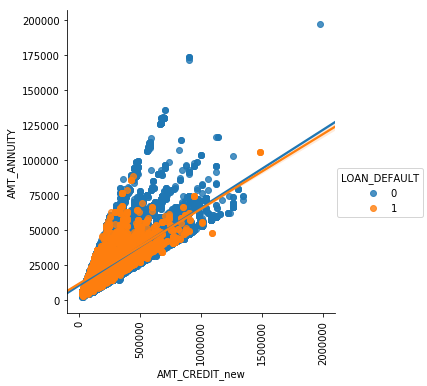

In [62]:
scatterplot = sns.lmplot(x='AMT_CREDIT_new', y='AMT_ANNUITY', hue = 'LOAN_DEFAULT' , data = df_[df_['NAME_CONTRACT_STATUS']=='Approved'])
scatterplot.set_xticklabels(rotation=90)

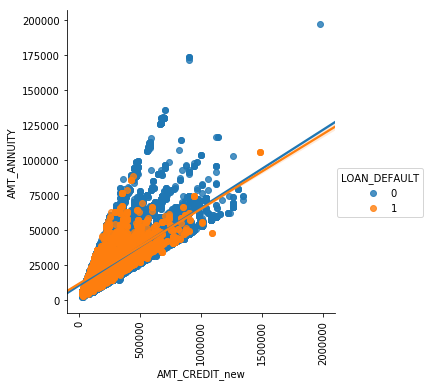

In [77]:
scatterplot2 = sns.lmplot(x='AMT_CREDIT_new', y='AMT_ANNUITY', hue = 'LOAN_DEFAULT' , data = df_[df_['NAME_CONTRACT_STATUS']=='Approved'])
scatterplot2.set_xticklabels(rotation=90)df_

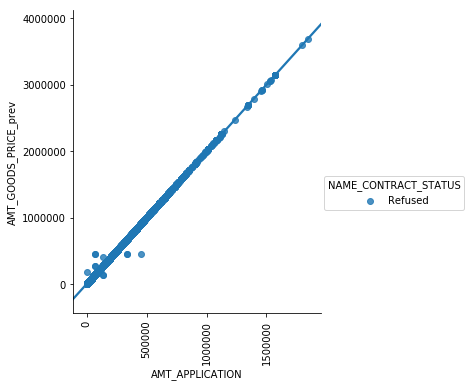

In [58]:
scatterplot3 = sns.lmplot(x='AMT_APPLICATION', y='AMT_GOODS_PRICE_prev', hue = 'NAME_CONTRACT_STATUS' , data = df_[df_['NAME_CONTRACT_STATUS']=='Refused'])
scatterplot3.set_xticklabels(rotation=90)

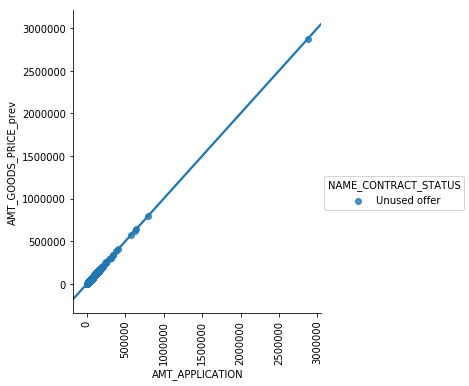

In [59]:
scatterplot4 = sns.lmplot(x='AMT_APPLICATION', y='AMT_GOODS_PRICE_prev', hue = 'NAME_CONTRACT_STATUS' , data = df_[df_['NAME_CONTRACT_STATUS']=='Unused offer'])
scatterplot4.set_xticklabels(rotation=90)

In [74]:
df_[df_['NAME_CONTRACT_STATUS']=='Approved']['LOAN_DEFAULT'].value_counts()

0    48609
1     3913
Name: LOAN_DEFAULT, dtype: int64

In [81]:
df_.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)